# Estudios y empleabilidad (Encuesta Kaggle)

El Presente trabajo analiza la encuesta del dataset de https://www.kaggle.com/datasets/lainguyn123/employee-survey?select=employee_survey.csv

Dicho dataset es una encueta de trabajo a distintos públicos que muestra factores como genero, satisfacción y otros que se detallarán más adelante.

## Agenda

- [Estudios y empleabilidad (Encuesta Kaggle)](#estudios-y-empleabilidad-encuesta-kaggle)
  - [Agenda](#agenda)
  - [Objetivo](#objetivo)
  - [Hipotesis](#hipotesis)
  - [Limitantes](#limitantes)
- [Dataset](#dataset)
  - [Descripción de variables](#descripción-de-variables)
- [Importación de librerias](#importación-de-librerias)
- [Análisis Exploratorio](#análisis-exploratorio)
  - [Nivel Educativo vs Nivel de trabajo](#nivel-educativo-vs-nivel-de-trabajo)
    - [Grafico de caja](#grafico-de-caja)
  - [Genero vs Satisfacción laboral](#genero-vs-satisfacción-laboral)
    - [Gráfico de cajas](#gráfico-de-cajas)
  - [JobLevel vs Overtime](#joblevel-vs-overtime)
  - [Headmap de correlación](#headmap-de-correlación)
- [Conclusiones análisis exploratorio](#conclusiones-análisis-exploratorio)
- [Machine Learning](#machine-learning)
  - [División train - test](#división-train---test)
  - [One-hot encoding y label encoding](#one-hot-encoding-y-label-encoding)
    - [Limpieza df](#limpieza-df)
    - [División para one-hot encoding y label encoding](#división-para-one-hot-encoding-y-label-encoding)
  - [Modelos Machine Learning](#modelos-machine-learning)
    - [Regresion logística](#regresion-logística)
    - [Arboles de decisión](#arboles-de-decisión)
    - [Random Forest](#random-forest)
    - [XGBOOST](#xgboost)
    - [KNN](#knn)
  - [Validación cruzada](#validación-cruzada)
  - [Regularización](#regularización)
- [Conclusiones Machine Learning](#conclusiones-machine-learning)


## Objetivo

El objetivo del presente trabajo es ver si el nivel de estudios (y otras variables) tienen relación con conseguir un mejor trabajo (nivel de satisfacción).

## Hipotesis

a. Mientras mayor es el nivel de estudios, mayor es el nivel de trabajo que tiene (JobLevel). <br>
b. Por políticas de igualdad de género, la diferencia entre el nivel de satisfacción entre hombres y mujeres debe ser menor a 0.5 puntos. <br>
c. Los trabajos de mayor rango (JobLevel: Senior y Lider) tienen más sobretiempo en promedio.

## Limitantes

El trabajo esta enmarcado en la encuesta del dataset de https://www.kaggle.com/datasets/lainguyn123/employee-survey?select=employee_survey.csv

# Dataset

## Descripción de variables

<li>	EmpID	:	ID del empleado	.	</li>
<li>	Gender	:	Genero del empleado	.	</li>
<li>	Age	:	Edad del empleado	.	</li>
<li>	MaritalStatus	:	Estado Marital (casado, soltero, divorsiado, viudo)	.	</li>
<li>	JobLevel	:	Nivel de empleado (Interno, Junior, Semi-senior, Senieor, Lider)	.	</li>
<li>	Experience	:	Años de experiencia	.	</li>
<li>	Dept	:	Área donde trabaja	.	</li>
<li>	EmpType	:	Tipo de empleo (full-time, part-time, Contrato)	.	</li>
<li>	WLB	:	Puntuación de vida de trabajo, del 1 al 5	.	</li>
<li>	WorkEnv	:	Puntuación de ambiente laboral del 1 al 5	.	</li>
<li>	PhysicalActivityHours	:	Numero de horas de actividad física por semana.	.	</li>
<li>	Workload	:	Puntuación de carga de trabajo del 1 al 5	.	</li>
<li>	Stress	:	Puntuación de estrés en el trabajo de 1 al 5	.	</li>
<li>	SleepHours	:	Numero de horas que duerme por noche	.	</li>
<li>	CommuteMode	:	Modo de desplazamiento al trabajo (coche, transporte público, bicicleta, a pie, moto)	.	</li>
<li>	CommuteDistance	:	Distacia de desplazamiento al trabajo (en Km)	.	</li>
<li>	NumCompanies	:	Numero de diferentes compañias en el que el trabajado va trabajando	.	</li>
<li>	TeamSize	:	Tamaño del equipo al que pertenece	.	</li>
<li>	NumReports	:	Numero de trabajadores que le reportan (solo aplica a seniors y lideres)	.	</li>
<li>	EduLevel	:	Nivel de educación	.	</li>
<li>	haveOT	:	Hace horas extras (verdadero/falso)	.	</li>
<li>	TrainingHoursPerYear	:	Numero de horas de entrenamiento recibido por año	.	</li>
<li>	JobSatisfaction	:	Puntuación de satisfacción del trabajo del 1 al 5	.	</li>


# Importación de librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, learning_curve

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Evaluación de métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_squared_error, confusion_matrix, classification_report,
                             make_scorer)

# Clustering
from sklearn.cluster import KMeans

# Guardado de modelos
import joblib

# Otros
import os
import itertools
import warnings


In [2]:
# Creación de carpeta para gráficos para ppt
if not os.path.exists('graficos'):
    os.makedirs('graficos')

# Análisis Exploratorio

Carga del Dataframe

In [3]:
# Importo el dataset de Github
url = 'https://raw.githubusercontent.com/JoseChirif/Estudios-y-empleabilidad-Encuesta-kaggle/refs/heads/main/employee_survey.csv'

# Carlo el dataset
df = pd.read_csv(url)

#Verifico el dataset
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


Transformar valores a Español

In [4]:
##GENDER
# Crear un diccionario para el mapeo de valores
gender_map = {
    'Male': 'Masculino',
    'Female': 'Femenino',
    'Other': 'Otros'
}
# Reemplazar los valores en la columna 'Gender'
df['Gender'] = df['Gender'].replace(gender_map)
#Imprimo valores
print(f'Gender:')
print(df['Gender'].unique())
print(f'\n')


##DEPT
# Crear un diccionario para el mapeo de valores
Dept_map = {
    'IT': 'TI',
    'Finance': 'Finanzas',
    'Sales': 'Ventas',
    'Operations': 'Operaciones',
    'Customer Service': 'Servicio al cliente',
    'HR': 'Recursos Humanos'
}
# Reemplazar los valores en la columna 'Gender'
df['Dept'] = df['Dept'].replace(Dept_map)
#Imprimo valores
print(f'Dept')
print(df['Dept'].unique())
print(f'\n')



##EmpType
# Crear un diccionario para el mapeo de valores
EmpType_map = {
    'Contract': 'Contrato'
}
# Reemplazar los valores en la columna 'Gender'
df['EmpType'] = df['EmpType'].replace(EmpType_map)
#Imprimo valores
print(f'EmpType')
print(df['EmpType'].unique())
print(f'\n')


##CommuteMode
# Crear un diccionario para el mapeo de valores
CommuteMode_map = {
    'Car': 'Carro',
    'Motorbike': 'Moto',
    'Public Transport': 'Transporte Público',
    'Bike': 'Bicicleta',
    'Walk': 'Camina'
}
# Reemplazar los valores en la columna 'Gender'
df['CommuteMode'] = df['CommuteMode'].replace(CommuteMode_map)
#Imprimo valores
print(f'CommuteMode')
print(df['CommuteMode'].unique())
print(f'\n')



##EduLevel
# Crear un diccionario para el mapeo de valores
EduLevel_map = {
    'High School': '1 - Secundaria',
    'Bachelor': '2 - Bachiller',
    'Master': '3 - Master',
    'PhD': '4 - PhD'
}
# Reemplazar los valores en la columna 'Gender'
df['EduLevel'] = df['EduLevel'].replace(EduLevel_map)
#Imprimo valores
print(f'EduLevel:')
print(df['EduLevel'].unique())
print(f'\n')


##JobLevel
# Crear un diccionario para el mapeo de valores
JobLevel_map = {
    'Intern/Fresher': '1 - Practicante',
    'Junior': '2 - Junior',
    'Mid': '3 - Semi-senior',
    'Senior': '4 - Senior',
    'Lead': '5 - Lider'
}
# Reemplazar los valores en la columna 'Gender'
df['JobLevel'] = df['JobLevel'].replace(JobLevel_map)
#Imprimo valores
print(f'JobLevel:')
print(df['JobLevel'].unique())
print(f'\n')



##MaritalStatus
# Crear un diccionario para el mapeo de valores
MaritalStatus_map = {
    'Married': 'Casado',
    'Single': 'soltero',
    'Divorced': 'Divorciado',
    'Widowed': 'Viudo'
}
# Reemplazar los valores en la columna 'Gender'
df['MaritalStatus'] = df['MaritalStatus'].replace(MaritalStatus_map)
#Imprimo valores
print(f'MaritalStatus')
print(df['MaritalStatus'].unique())
print(f'\n')

Gender:
['Masculino' 'Femenino' 'Otros']


Dept
['TI' 'Finanzas' 'Marketing' 'Ventas' 'Operaciones' 'Servicio al cliente'
 'Legal' 'Recursos Humanos']


EmpType
['Full-Time' 'Contrato' 'Part-Time']


CommuteMode
['Carro' 'Moto' 'Transporte Público' 'Bicicleta' 'Camina']


EduLevel:
['2 - Bachiller' '1 - Secundaria' '3 - Master' '4 - PhD']


JobLevel:
['3 - Semi-senior' '1 - Practicante' '2 - Junior' '4 - Senior' '5 - Lider']


MaritalStatus
['Casado' 'soltero' 'Divorciado' 'Viudo']




## Nivel Educativo vs Nivel de trabajo

En base a la primera hipótesis (Mientras mayor es el nivel de estudios, mayor es el nivel de trabajo que tiene (JobLevel).), Graficare si existe relación entre ambas.

In [5]:
# Creo las columnas numericas que categoricen EduLevel y JobLevel
df['EduLevel_categoria'] = df['EduLevel'].str.split(' - ', expand=True)[0].astype(int)
df['JobLevel_categoria'] = df['JobLevel'].str.split(' - ', expand=True)[0].astype(int)

In [6]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction,EduLevel_categoria,JobLevel_categoria
0,6,Masculino,32,Casado,3 - Semi-senior,7,TI,Full-Time,1,1,...,20,3,12,0,2 - Bachiller,True,33.5,5,2,3
1,11,Femenino,34,Casado,3 - Semi-senior,12,Finanzas,Full-Time,1,1,...,15,4,11,0,2 - Bachiller,False,36.0,5,2,3
2,33,Femenino,23,soltero,1 - Practicante,1,Marketing,Full-Time,2,4,...,17,0,30,0,2 - Bachiller,True,10.5,5,2,1
3,20,Femenino,29,Casado,2 - Junior,6,TI,Contrato,2,2,...,13,2,9,0,2 - Bachiller,True,23.0,5,2,2
4,28,Otros,23,soltero,2 - Junior,1,Ventas,Part-Time,3,1,...,20,0,7,0,2 - Bachiller,False,20.5,5,2,2


### Grafico de caja

C:\Users\carlo\AppData\Local\Temp\ipykernel_2900\2701918152.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='JobLevel_categoria', y='EduLevel_categoria', data=df_temp, palette='viridis')


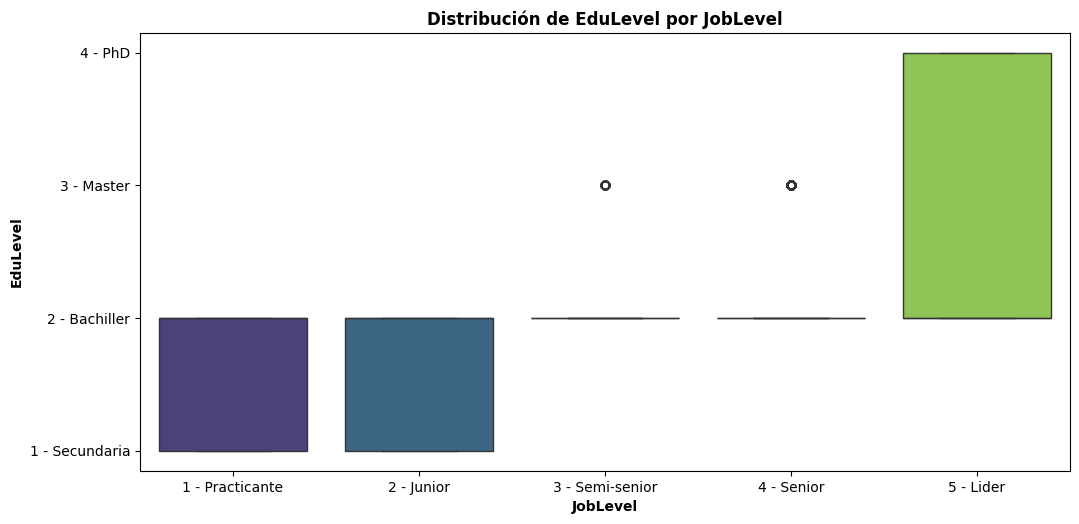

In [7]:
#Trabajare sobre un df_temp
df_temp = df.copy()


# Crear mapeos de categorías originales a numéricas
edu_levels_mapping = df_temp[['EduLevel', 'EduLevel_categoria']].drop_duplicates().sort_values('EduLevel_categoria')
job_levels_mapping = df_temp[['JobLevel', 'JobLevel_categoria']].drop_duplicates().sort_values('JobLevel_categoria')

# Crear mapeos de los valores numéricos a categorías originales
edu_levels_rev_mapping = edu_levels_mapping.set_index('EduLevel_categoria')['EduLevel'].to_dict()
job_levels_rev_mapping = job_levels_mapping.set_index('JobLevel_categoria')['JobLevel'].to_dict()

# Crear el gráfico de caja
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='JobLevel_categoria', y='EduLevel_categoria', data=df_temp, palette='viridis')

# Ajustar los detalles del gráfico
plt.title('Distribución de EduLevel por JobLevel', fontweight='bold')
plt.xlabel('JobLevel', fontweight='bold')
plt.ylabel('EduLevel', fontweight='bold')

# Obtener valores únicos y ordenados para los ticks del eje x
job_level_ticks = sorted(df_temp['JobLevel_categoria'].unique())
# Desplazar los ticks del eje x a la izquierda
adjusted_ticks = [tick - 1 for tick in job_level_ticks]

# Reemplazar etiquetas del eje x con categorías originales
ax.set_xticks(adjusted_ticks)
ax.set_xticklabels([job_levels_rev_mapping[i] for i in job_level_ticks])

# Reemplazar etiquetas del eje y con categorías originales
edu_level_ticks = sorted(df_temp['EduLevel_categoria'].unique())
ax.set_yticks(edu_level_ticks)
ax.set_yticklabels([edu_levels_rev_mapping[i] for i in edu_level_ticks])

# Ajustar el margen inferior para dar más espacio a las etiquetas del eje x
plt.subplots_adjust(bottom=0.15)

# Quitar las líneas de cuadrícula
plt.grid(False)

# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico1', bbox_inches='tight')

plt.show()


C:\Users\carlo\AppData\Local\Temp\ipykernel_2900\3035119390.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='EduLevel_categoria_jittered', y='JobLevel_categoria_jittered', data=df_temp, alpha=0.6, palette='viridis')


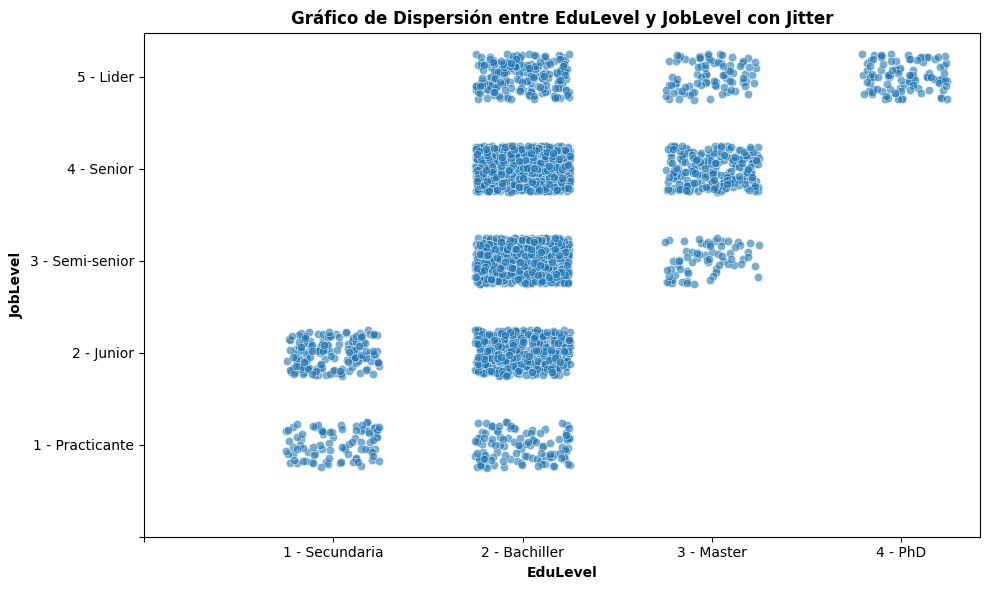

In [8]:
## Scatter plot (Con jitter para notar la acumulación de puntos)

# Crear mapeos de categorías originales a numéricas
edu_levels_mapping = df_temp[['EduLevel', 'EduLevel_categoria']].drop_duplicates().sort_values('EduLevel_categoria')
job_levels_mapping = df_temp[['JobLevel', 'JobLevel_categoria']].drop_duplicates().sort_values('JobLevel_categoria')

# Crear mapeos de los valores numéricos a categorías originales
edu_levels_rev_mapping = edu_levels_mapping.set_index('EduLevel_categoria')['EduLevel'].to_dict()
job_levels_rev_mapping = job_levels_mapping.set_index('JobLevel_categoria')['JobLevel'].to_dict()

# Añadir jitter a los datos
jitter_strength = 0.25
df_temp['EduLevel_categoria_jittered'] = df_temp['EduLevel_categoria'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df_temp))
df_temp['JobLevel_categoria_jittered'] = df_temp['JobLevel_categoria'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df_temp))

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EduLevel_categoria_jittered', y='JobLevel_categoria_jittered', data=df_temp, alpha=0.6, palette='viridis')

# Configurar el título y las etiquetas
plt.title('Gráfico de Dispersión entre EduLevel y JobLevel con Jitter', fontweight='bold')
plt.xlabel('EduLevel', fontweight='bold')
plt.ylabel('JobLevel', fontweight='bold')

# Configurar ticks en el eje x
xticks = np.arange(int(df_temp['EduLevel_categoria_jittered'].min()), int(df_temp['EduLevel_categoria_jittered'].max()) + 1, 1)
plt.xticks(ticks=xticks, labels=[edu_levels_rev_mapping.get(int(x), '') for x in xticks])

# Configurar ticks en el eje y
yticks = np.arange(int(df_temp['JobLevel_categoria_jittered'].min()), int(df_temp['JobLevel_categoria_jittered'].max()) + 1, 1)
plt.yticks(ticks=yticks, labels=[job_levels_rev_mapping.get(int(y), '') for y in yticks])

# Ajusta el diseño para que se ajuste a la figura
plt.tight_layout()  
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico2 - scatterplot jitter', bbox_inches='tight')
# Mostrar el gráfico
plt.show()

In [9]:
# Crear la tabla de contingencia con conteos
contingency_table = pd.crosstab(df_temp['JobLevel'], df_temp['EduLevel'])

# Convertir los conteos en porcentajes
contingency_table_percentage = contingency_table.div(contingency_table.sum().sum(), axis=None) * 100

# Redondear a dos decimalesz
contingency_table_percentage = contingency_table_percentage.round(2)

# Mostrar resultados
display(contingency_table_percentage)

EduLevel,1 - Secundaria,2 - Bachiller,3 - Master,4 - PhD
JobLevel,,,,
1 - Practicante,2.91,3.77,0.00,0.00
2 - Junior,5.19,14.71,0.00,0.00
3 - Semi-senior,0.00,23.07,2.25,0.00
4 - Senior,0.00,27.90,7.44,0.00
5 - Lider,0.00,6.58,2.88,3.31


In [10]:
print(f'Los Bachilleres Junior, Semi-senior y Senior son el total de {14.71 + 23.07 + 27.9} % de la población')

Los Bachilleres Junior, Semi-senior y Senior son el total de 65.68 % de la población


En efecto se observa relación del Nivel de educación con el puesto de trabajo. Sin embargo, es una relación media, ya que la mayoria de puestos son de bachilleres que van desde Junior hasta Senior.

## Genero vs Satisfacción laboral

En base a la segunda hipótesis (Por políticas de igualdad de género, la diferencia entre el nivel de satisfacción entre hombres y mujeres debe ser menor a 0.5 puntos.), Graficare si existe relación entre ambas.

In [11]:
## Creo la columnas numerica que categoricen Gender
# Obtener los valores únicos de la columna Gender
unique_genders = df['Gender'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
gender_category_mapping = {gender: idx + 1 for idx, gender in enumerate(unique_genders)}

# Crear una nueva columna Gender_categoria utilizando el diccionario de mapeo
df['Gender_categoria'] = df['Gender'].map(gender_category_mapping)


In [12]:
#Imprimo la relacion Gender_categoria y Gender
# Seleccionar solo las columnas Gender_categoria y Gender y eliminar duplicados
result_df = df[['Gender_categoria', 'Gender']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))


 Gender_categoria    Gender
                1 Masculino
                2  Femenino
                3     Otros


In [13]:
# Mostrar los valores únicos y los primeros registros del DataFrame para verificar
df.head()


,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction,EduLevel_categoria,JobLevel_categoria,Gender_categoria
0,6,Masculino,32,Casado,3 - Semi-senior,7,TI,Full-Time,1,1,...,3,12,0,2 - Bachiller,True,33.5,5,2,3,1
1,11,Femenino,34,Casado,3 - Semi-senior,12,Finanzas,Full-Time,1,1,...,4,11,0,2 - Bachiller,False,36.0,5,2,3,2
2,33,Femenino,23,soltero,1 - Practicante,1,Marketing,Full-Time,2,4,...,0,30,0,2 - Bachiller,True,10.5,5,2,1,2
3,20,Femenino,29,Casado,2 - Junior,6,TI,Contrato,2,2,...,2,9,0,2 - Bachiller,True,23.0,5,2,2,2
4,28,Otros,23,soltero,2 - Junior,1,Ventas,Part-Time,3,1,...,0,7,0,2 - Bachiller,False,20.5,5,2,2,3


### Gráfico de cajas

C:\Users\carlo\AppData\Local\Temp\ipykernel_2900\2088423229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Gender', y='JobSatisfaction', data=df, palette='viridis', showmeans=False)


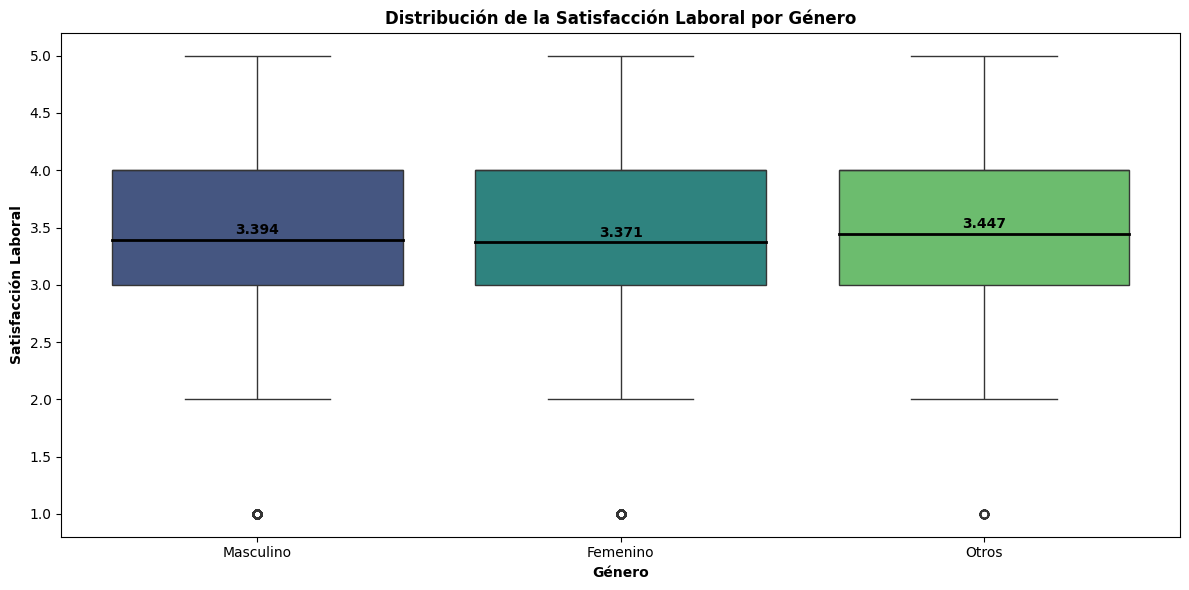

In [14]:
# Crear el gráfico de caja
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Gender', y='JobSatisfaction', data=df, palette='viridis', showmeans=False)

# Calcular las medias
means = df.groupby('Gender')['JobSatisfaction'].mean().reset_index()

# Añadir líneas negras para las medias y etiquetas de porcentaje
for i, (gender, mean) in enumerate(zip(means['Gender'], means['JobSatisfaction'])):
    # Dibujar una línea negra que atraviese completamente el ancho de la caja
    ax.plot([i - 0.4, i + 0.4], [mean, mean], color='black', lw=2, label=f'Media {gender}' if i == 0 else "")
    
    # Convertir la media a un porcentaje o un número formateado y añadir una etiqueta justo encima de la línea
    label = f'{mean:.3f}'
    ax.text(i, mean + 0.05, label, horizontalalignment='center', size='medium', color='black', weight='semibold')

# Configurar el título y las etiquetas
plt.title('Distribución de la Satisfacción Laboral por Género', fontweight='bold')
plt.xlabel('Género', fontweight='bold')
plt.ylabel('Satisfacción Laboral', fontweight='bold')

# Eliminar las gridlines
plt.grid(False)

# Ajusta el diseño para que se ajuste a la figura
plt.tight_layout()  
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico3 - boxes', bbox_inches='tight')
# Mostrar el gráfico
plt.show()


Se demuestra que es similar, la diferencia máxima de puntaje entre generos es de 0.053 puntos. Por lo que la segunda hipótesis tambien es verdadera.

## JobLevel vs Overtime

Según la tercera hipótesis, Los trabajos de mayor rango (JobLevel: Senior y Lider) tienen más sobretiempo en promedio. Ello se comprobrará a continuación.

In [15]:
# Contar la cantidad de True y False para cada JobLevel
counts = df.groupby(['JobLevel', 'haveOT']).size().unstack(fill_value=0)

# Calcular los porcentajes
percentages = counts.divide(counts.sum(axis=1), axis=0) * 100
percentages = percentages.round(2)

# Combinar los conteos y porcentajes en un solo DataFrame
summary = pd.concat([counts, percentages], axis=1, keys=['Cantidad', 'Porcentajes'])

In [16]:
summary

Cantidad       Porcentajes       
haveOT             False True        False  True 
JobLevel                                         
1 - Practicante      144    58       71.29  28.71
2 - Junior           420   182       69.77  30.23
3 - Semi-senior      511   255       66.71  33.29
4 - Senior           747   322       69.88  30.12
5 - Lider            267   119       69.17  30.83

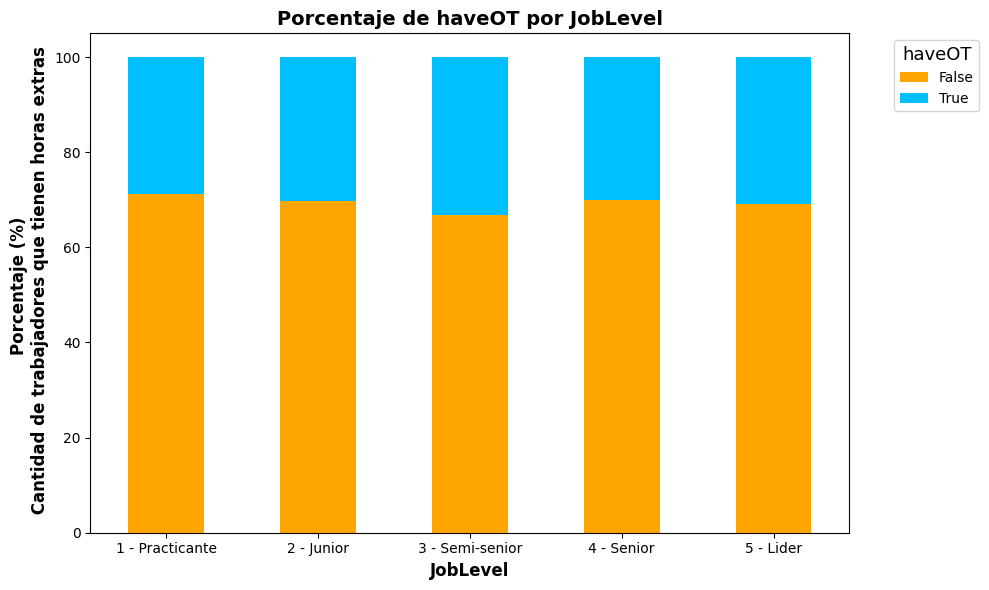

In [17]:
## Crear gráfico de barras apiladas
ax = percentages.plot(kind='bar', stacked=True, color=['#FFA500','#00BFFF'], figsize=(10, 6))  # Invertir los colores

# Configuración de los títulos y etiquetas
plt.title('Porcentaje de haveOT por JobLevel', fontsize=14, fontweight='bold')
plt.xlabel('JobLevel', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje (%) \n Cantidad de trabajadores que tienen horas extras', fontsize=12, fontweight='bold')

# Configurar las etiquetas del eje x para que no se roten
plt.xticks(rotation=0)

# Mostrar la leyenda a la derecha con el orden invertido
plt.legend(title='haveOT', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['False','True'])

# Ajustar el layout para que no se corte la leyenda
plt.tight_layout()

# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico4 - barras porc', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


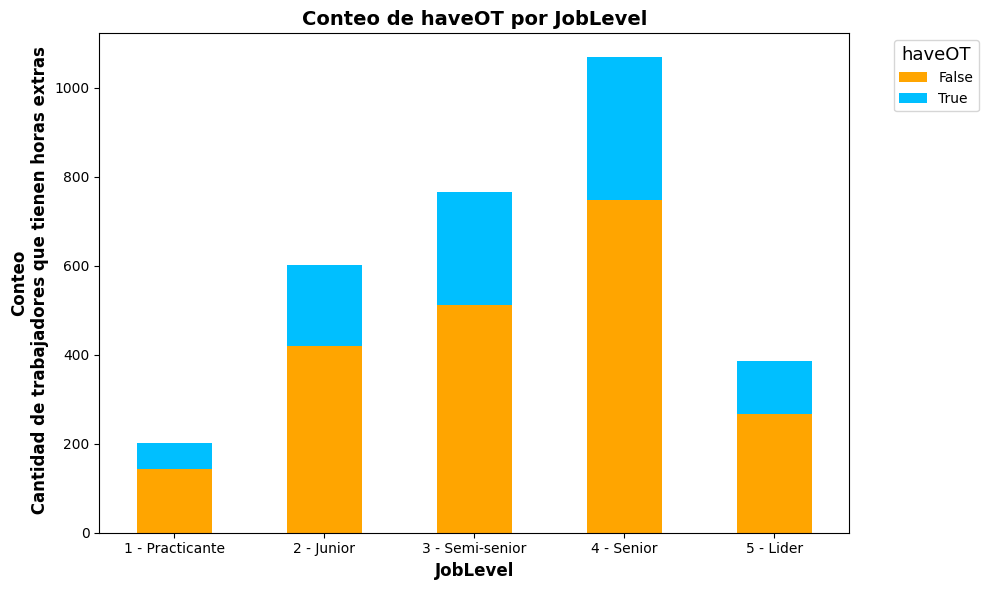

In [18]:
## Crear gráfico de barras apiladas
ax = counts.plot(kind='bar', stacked=True, color=['#FFA500','#00BFFF'], figsize=(10, 6))

# Configuración de los títulos y etiquetas
plt.title('Conteo de haveOT por JobLevel', fontsize=14, fontweight='bold')
plt.xlabel('JobLevel', fontsize=12, fontweight='bold')
plt.ylabel('Conteo\n Cantidad de trabajadores que tienen horas extras', fontsize=12, fontweight='bold')

# Configurar las etiquetas del eje x para que no se roten
plt.xticks(rotation=0)

# Mostrar la leyenda a la derecha
plt.legend(title='haveOT', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para que no se corte la leyenda
plt.tight_layout()

# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico5 - barras', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


Se ve que se entrevistaron más seniors. Pero porcentualemnte el nivel de satisfacción es igual independientemente del puesto. Por tanto, la tercera hipótesis es falsa.

## Headmap de correlación

Para corroborar, haré un headmap de correlación. 
Como primer paso creare las variable categoricas (númericas) de aquellos que tienen valores textuales o alfanumericos.

In [19]:
print(df.dtypes)

EmpID                      int64
Gender                    object
Age                        int64
MaritalStatus             object
JobLevel                  object
Experience                 int64
Dept                      object
EmpType                   object
WLB                        int64
WorkEnv                    int64
PhysicalActivityHours    float64
Workload                   int64
Stress                     int64
SleepHours               float64
CommuteMode               object
CommuteDistance            int64
NumCompanies               int64
TeamSize                   int64
NumReports                 int64
EduLevel                  object
haveOT                      bool
TrainingHoursPerYear     float64
JobSatisfaction            int64
EduLevel_categoria         int64
JobLevel_categoria         int64
Gender_categoria           int64
dtype: object


In [20]:
## Creo la columnas numerica que categoricen MaritalStatus
# Obtener los valores únicos de la columna MaritalStatus
unique_MaritalStatus = df['MaritalStatus'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
MaritalStatus_category_mapping = {MaritalStatus: idx + 1 for idx, MaritalStatus in enumerate(unique_MaritalStatus)}

# Crear una nueva columna MaritalStatus_categoria utilizando el diccionario de mapeo
df['MaritalStatus_categoria'] = df['MaritalStatus'].map(MaritalStatus_category_mapping)

#Imprimo la relacion MaritalStatus_categoria y MaritalStatus
# Seleccionar solo las columnas MaritalStatus_categoria y MaritalStatus y eliminar duplicados
result_df = df[['MaritalStatus_categoria', 'MaritalStatus']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))

 MaritalStatus_categoria MaritalStatus
                       1        Casado
                       2       soltero
                       3    Divorciado
                       4         Viudo


In [21]:

## Creo la columnas numerica que categoricen Dept
# Obtener los valores únicos de la columna Dept
unique_Dept = df['Dept'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
Dept_category_mapping = {Dept: idx + 1 for idx, Dept in enumerate(unique_Dept)}

# Crear una nueva columna Dept_categoria utilizando el diccionario de mapeo
df['Dept_categoria'] = df['Dept'].map(Dept_category_mapping)

#Imprimo la relacion Dept_categoria y Dept
# Seleccionar solo las columnas Dept_categoria y Dept y eliminar duplicados
result_df = df[['Dept_categoria', 'Dept']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))


 Dept_categoria                Dept
              1                  TI
              2            Finanzas
              3           Marketing
              4              Ventas
              5         Operaciones
              6 Servicio al cliente
              7               Legal
              8    Recursos Humanos


In [22]:
## Creo la columnas numerica que categoricen EmpType
# Obtener los valores únicos de la columna EmpType
unique_EmpType = df['EmpType'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
EmpType_category_mapping = {EmpType: idx + 1 for idx, EmpType in enumerate(unique_EmpType)}

# Crear una nueva columna EmpType_categoria utilizando el diccionario de mapeo
df['EmpType_categoria'] = df['EmpType'].map(EmpType_category_mapping)

#Imprimo la relacion EmpType_categoria y EmpType
# Seleccionar solo las columnas EmpType_categoria y EmpType y eliminar duplicados
result_df = df[['EmpType_categoria', 'EmpType']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))

 EmpType_categoria   EmpType
                 1 Full-Time
                 2  Contrato
                 3 Part-Time


In [23]:

## Creo la columnas numerica que categoricen CommuteMode
# Obtener los valores únicos de la columna CommuteMode
unique_CommuteMode = df['CommuteMode'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
CommuteMode_category_mapping = {CommuteMode: idx + 1 for idx, CommuteMode in enumerate(unique_CommuteMode)}

# Crear una nueva columna CommuteMode_categoria utilizando el diccionario de mapeo
df['CommuteMode_categoria'] = df['CommuteMode'].map(CommuteMode_category_mapping)

#Imprimo la relacion CommuteMode_categoria y CommuteMode
# Seleccionar solo las columnas CommuteMode_categoria y CommuteMode y eliminar duplicados
result_df = df[['CommuteMode_categoria', 'CommuteMode']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))

 CommuteMode_categoria        CommuteMode
                     1              Carro
                     2               Moto
                     3 Transporte Público
                     4          Bicicleta
                     5             Camina


In [24]:
## Creo la columnas numerica que categoricen haveOT
# Obtener los valores únicos de la columna haveOT
unique_haveOT = df['haveOT'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
haveOT_category_mapping = {haveOT: idx + 1 for idx, haveOT in enumerate(unique_haveOT)}

# Crear una nueva columna haveOT_categoria utilizando el diccionario de mapeo
df['haveOT_categoria'] = df['haveOT'].map(haveOT_category_mapping)

#Imprimo la relacion haveOT_categoria y haveOT
# Seleccionar solo las columnas haveOT_categoria y haveOT y eliminar duplicados
result_df = df[['haveOT_categoria', 'haveOT']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))


 haveOT_categoria  haveOT
                1    True
                2   False


In [25]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,TrainingHoursPerYear,JobSatisfaction,EduLevel_categoria,JobLevel_categoria,Gender_categoria,MaritalStatus_categoria,Dept_categoria,EmpType_categoria,CommuteMode_categoria,haveOT_categoria
0,6,Masculino,32,Casado,3 - Semi-senior,7,TI,Full-Time,1,1,...,33.5,5,2,3,1,1,1,1,1,1
1,11,Femenino,34,Casado,3 - Semi-senior,12,Finanzas,Full-Time,1,1,...,36.0,5,2,3,2,1,2,1,1,2
2,33,Femenino,23,soltero,1 - Practicante,1,Marketing,Full-Time,2,4,...,10.5,5,2,1,2,2,3,1,2,1
3,20,Femenino,29,Casado,2 - Junior,6,TI,Contrato,2,2,...,23.0,5,2,2,2,1,1,2,3,1
4,28,Otros,23,soltero,2 - Junior,1,Ventas,Part-Time,3,1,...,20.5,5,2,2,3,2,4,3,1,2


In [26]:
## Ordenar columnas para que esten al lado de sus categorias
# Definir las primeras tres columnas deseadas
first_columns = ['EmpID', 'Gender', 'Age']

# Obtener las demás columnas y ordenarlas alfabéticamente
remaining_columns = [col for col in df.columns if col not in first_columns]
remaining_columns.sort()

# Crear el nuevo orden de columnas
new_column_order = first_columns + remaining_columns

# Reordenar las columnas del DataFrame
df = df[new_column_order]



In [27]:
df.head()

,EmpID,Gender,Age,CommuteDistance,CommuteMode,CommuteMode_categoria,Dept,Dept_categoria,EduLevel,EduLevel_categoria,...,PhysicalActivityHours,SleepHours,Stress,TeamSize,TrainingHoursPerYear,WLB,WorkEnv,Workload,haveOT,haveOT_categoria
0,6,Masculino,32,20,Carro,1,TI,1,2 - Bachiller,2,...,2.5,7.6,1,12,33.5,1,1,2,True,1
1,11,Femenino,34,15,Carro,1,Finanzas,2,2 - Bachiller,2,...,1.8,7.9,2,11,36.0,1,1,2,False,2
2,33,Femenino,23,17,Moto,2,Marketing,3,2 - Bachiller,2,...,2.1,6.5,4,30,10.5,2,4,5,True,1
3,20,Femenino,29,13,Transporte Público,3,TI,1,2 - Bachiller,2,...,1.9,7.5,1,9,23.0,2,2,3,True,1
4,28,Otros,23,20,Carro,1,Ventas,4,2 - Bachiller,2,...,3.7,4.9,1,7,20.5,3,1,2,False,2


In [28]:
## Crear un dataframe con solo los valores categoricos
# Crear una copia del DataFrame
df_solocategoricos = df.copy()

# Identificar las columnas que contienen valores numéricos
numeric_columns = df_solocategoricos.select_dtypes(include=['number']).columns

# Eliminar columnas que no contienen valores numéricos
df_solocategoricos = df_solocategoricos[numeric_columns]

# Crear df_solocategoricos2 sin la columna 'EmpID' (Ya que es ID, no se usarán para análisis)
df_solocategoricos2 = df_solocategoricos.drop(columns=['EmpID'])


In [29]:
df_solocategoricos2.head()

,Age,CommuteDistance,CommuteMode_categoria,Dept_categoria,EduLevel_categoria,EmpType_categoria,Experience,Gender_categoria,JobLevel_categoria,JobSatisfaction,...,NumReports,PhysicalActivityHours,SleepHours,Stress,TeamSize,TrainingHoursPerYear,WLB,WorkEnv,Workload,haveOT_categoria
0,32,20,1,1,2,1,7,1,3,5,...,0,2.5,7.6,1,12,33.5,1,1,2,1
1,34,15,1,2,2,1,12,2,3,5,...,0,1.8,7.9,2,11,36.0,1,1,2,2
2,23,17,2,3,2,1,1,2,1,5,...,0,2.1,6.5,4,30,10.5,2,4,5,1
3,29,13,3,1,2,2,6,2,2,5,...,0,1.9,7.5,1,9,23.0,2,2,3,1
4,23,20,1,4,2,3,1,3,2,5,...,0,3.7,4.9,1,7,20.5,3,1,2,2


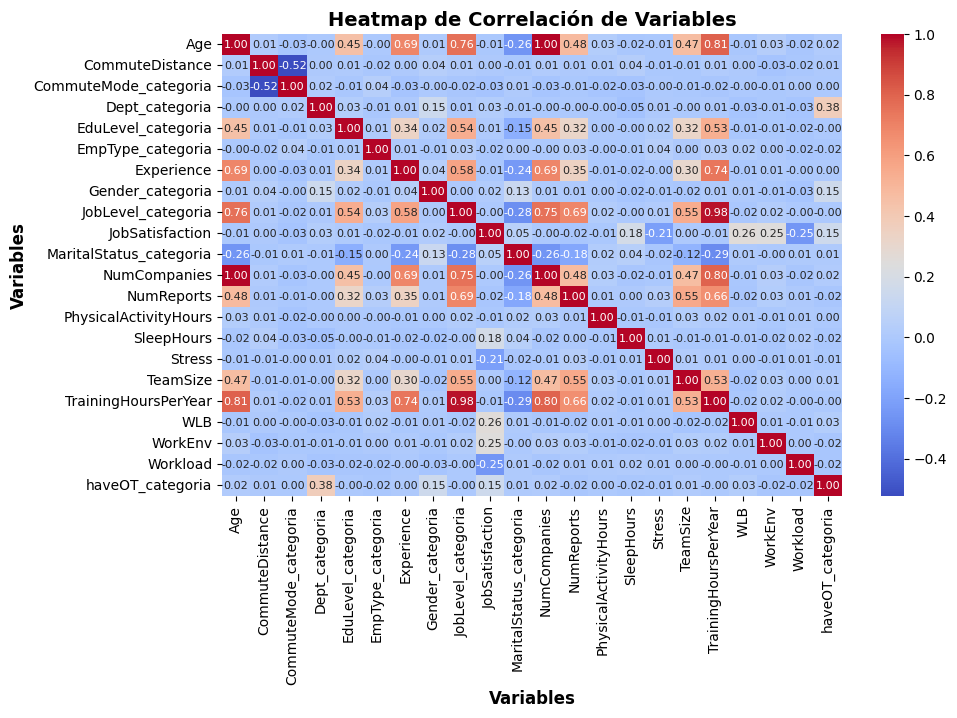

In [30]:
# Crear un heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(df_solocategoricos2.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Variables', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico6 - Heatmap completo', bbox_inches='tight')
# Mostrar el heatmap
plt.show()

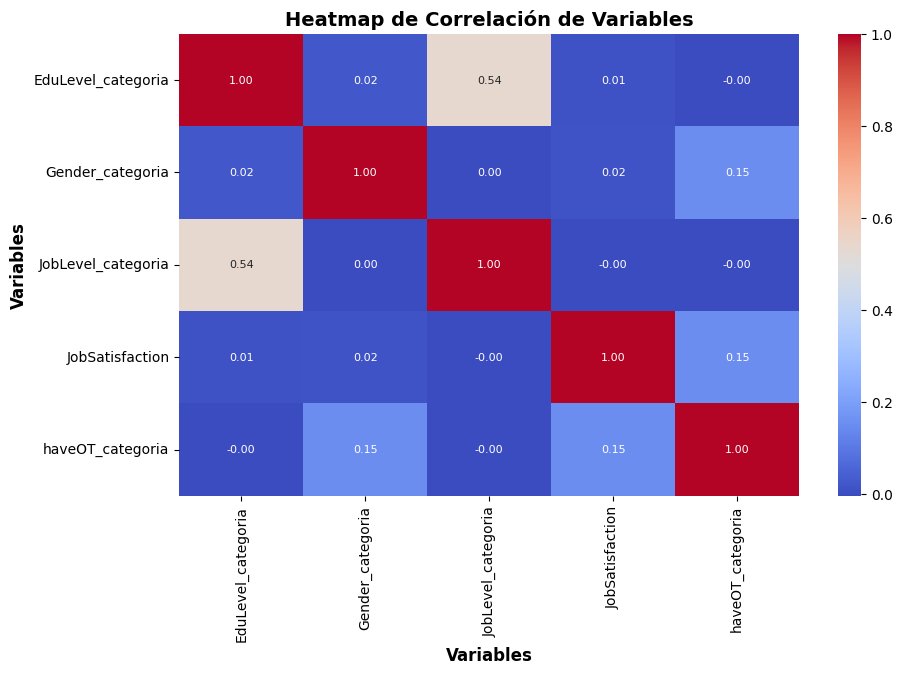

In [31]:
## Crear Headmap resumido para mejor visualización
# Crear df temporal con las varibles de interes para las hipótesis
df_temp = df_solocategoricos2[
    ['EduLevel_categoria', 'Gender_categoria', 'JobLevel_categoria', 'JobSatisfaction', 'haveOT_categoria']
]

# Crear un heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(df_temp.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Variables', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico7 - Heatmap reducido', bbox_inches='tight')
# Mostrar el heatmap
plt.show()

# Conclusiones análisis exploratorio

* Hipótesis a, Mientras mayor es el nivel de estudios, mayor es el nivel de trabajo que tiene (JobLevel): Verdadero, a mayores estudios hay puestos más altos.
* Hipótesis b, Por políticas de igualdad de género, la diferencia entre el nivel de satisfacción entre hombres y mujeres debe ser menor a 0.5 puntos: Verdadero, se comprobó que no hay relación de genero con satisfacción laboral y la diferencia máxima entre generos es de 0.053 puntos.
* Hipótesis c, Los trabajos de mayor rango (JobLevel: Senior y Lider) tienen más sobretiempo en promedio: Falso, el sobre tiempo lo toma al rededor del 65 a 70% de empleados, sin importar su nivel.

# Machine Learning

## División train - test

In [32]:
# Elimino EmpID por ser ID
df_sinID = df.drop(columns=['EmpID'])

# Se dividirá en 80% train y 20% test
df_train, df_test = train_test_split(df_sinID, test_size=0.20, train_size=0.80, random_state=42) #random_state=42 es el seed comúm para su uso.

In [33]:
porc_train = len(df_train)/len(df)*100
porc_test = len(df_test)/len(df)*100
# Redondeados
porc_train = int(round(porc_train,0))
porc_test = int(round(porc_test,0))

#imprimir porcentajes
print(f' df_train tiene {len(df_train)} datos igual al {porc_train}%')
print(f' df_test tiene {len(df_test)} datos igual al {porc_test}%')

 df_train tiene 2420 datos igual al 80%
 df_test tiene 605 datos igual al 20%


In [34]:
# Verifico que todos los valores categoricos tengan su codificación númerica.
print(df_train.dtypes)

Gender                      object
Age                          int64
CommuteDistance              int64
CommuteMode                 object
CommuteMode_categoria        int64
Dept                        object
Dept_categoria               int64
EduLevel                    object
EduLevel_categoria           int64
EmpType                     object
EmpType_categoria            int64
Experience                   int64
Gender_categoria             int64
JobLevel                    object
JobLevel_categoria           int64
JobSatisfaction              int64
MaritalStatus               object
MaritalStatus_categoria      int64
NumCompanies                 int64
NumReports                   int64
PhysicalActivityHours      float64
SleepHours                 float64
Stress                       int64
TeamSize                     int64
TrainingHoursPerYear       float64
WLB                          int64
WorkEnv                      int64
Workload                     int64
haveOT              

## One-hot encoding y label encoding

### Limpieza df

Está técnica permite y trabaja bien con variables categoricas. Por tanto, dejaré las categoricas y eliminaré las categoricas codificadas.

In [35]:
df_clean = df.drop(columns=[
    'EmpID',
    'CommuteMode_categoria', 
    'Dept_categoria', 
    'EduLevel_categoria',
    'EmpType_categoria',
    'Gender_categoria',
    'JobLevel_categoria',
    'MaritalStatus_categoria',
    'haveOT_categoria'])

df_clean.head()

,Gender,Age,CommuteDistance,CommuteMode,Dept,EduLevel,EmpType,Experience,JobLevel,JobSatisfaction,...,NumReports,PhysicalActivityHours,SleepHours,Stress,TeamSize,TrainingHoursPerYear,WLB,WorkEnv,Workload,haveOT
0,Masculino,32,20,Carro,TI,2 - Bachiller,Full-Time,7,3 - Semi-senior,5,...,0,2.5,7.6,1,12,33.5,1,1,2,True
1,Femenino,34,15,Carro,Finanzas,2 - Bachiller,Full-Time,12,3 - Semi-senior,5,...,0,1.8,7.9,2,11,36.0,1,1,2,False
2,Femenino,23,17,Moto,Marketing,2 - Bachiller,Full-Time,1,1 - Practicante,5,...,0,2.1,6.5,4,30,10.5,2,4,5,True
3,Femenino,29,13,Transporte Público,TI,2 - Bachiller,Contrato,6,2 - Junior,5,...,0,1.9,7.5,1,9,23.0,2,2,3,True
4,Otros,23,20,Carro,Ventas,2 - Bachiller,Part-Time,1,2 - Junior,5,...,0,3.7,4.9,1,7,20.5,3,1,2,False


In [36]:
print(df_clean.dtypes)

Gender                    object
Age                        int64
CommuteDistance            int64
CommuteMode               object
Dept                      object
EduLevel                  object
EmpType                   object
Experience                 int64
JobLevel                  object
JobSatisfaction            int64
MaritalStatus             object
NumCompanies               int64
NumReports                 int64
PhysicalActivityHours    float64
SleepHours               float64
Stress                     int64
TeamSize                   int64
TrainingHoursPerYear     float64
WLB                        int64
WorkEnv                    int64
Workload                   int64
haveOT                      bool
dtype: object


### División para one-hot encoding y label encoding

A las variables categoricas que indican nivel les aplicaré label encoding (edu_level, job_level)

In [37]:
# Mapeo para categóricas con orden. Como se clasificarón con su nro de nivel correspondiente basta con extraer el número al inicio de la variable.
# Como algunos modelos de python esperan indice 0, restaré 1 a cada valor para respetar dicho indice.
df_clean['EduLevel'] = df_clean['EduLevel'].str.split(' - ').str[0].astype(int) - 1
df_clean['JobLevel'] = df_clean['JobLevel'].str.split(' - ').str[0].astype(int) - 1

# Aplicar One-Hot Encoding a las variables sin orden
df_clean = pd.get_dummies(df_clean, columns=['Gender', 'CommuteMode', 'Dept', 'EmpType', 'MaritalStatus', 'haveOT'])

# Definir la variable objetivo (target) y las características (features)
X = df_clean.drop('JobLevel', axis=1)  # Características
y = df_clean['JobLevel']  # Variable objetivo

# Dividir el conjunto de datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tamaño de X_train: (2420, 40)
Tamaño de X_test: (605, 40)
Tamaño de y_train: (2420,)
Tamaño de y_test: (605,)


In [38]:
# Crear un escalador
scaler = MinMaxScaler()

# Ajustar el escalador solo con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el escalador ajustado en el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)

Una vez divididos correctamente, se procede a implementar las herramientas de machine Learning.

In [39]:
# Ignorare los warning para los siguientes mmodelos
warnings.filterwarnings('ignore')

## Modelos Machine Learning

In [40]:
# Función para mostrar y guardar la matriz de confusión
def plot_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predichos")
    plt.ylabel("Verdadero")
    plt.title(f"Matriz de confusion - {model_name}")
    plt.show()

# Clases únicas en el conjunto de datos de entrenamiento para la matriz de confusión
job_levels = sorted(y.unique())


### Regresion logística

Logistic Regression - Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


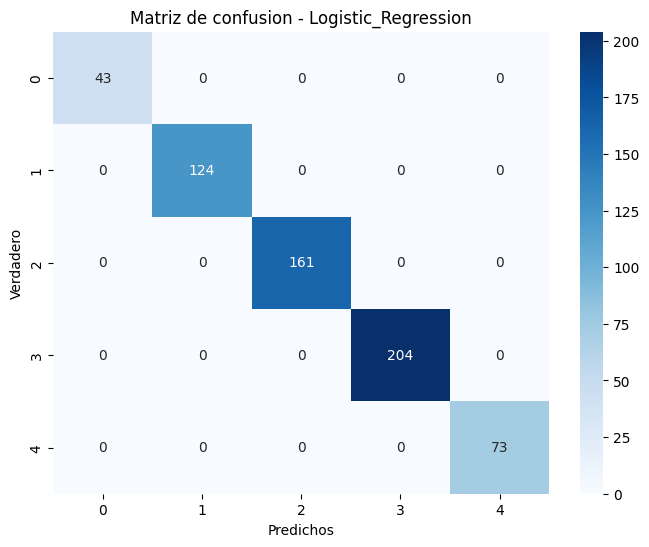

In [41]:
# Hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
}

# Optimización
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid_search_logreg = RandomizedSearchCV(logreg, param_distributions=param_grid, n_iter=10, scoring='f1_weighted', cv=5, random_state=42)
grid_search_logreg.fit(X_train_scaled, y_train)
best_logreg = grid_search_logreg.best_estimator_

# Predicción y evaluación
y_pred_logreg = best_logreg.predict(X_test_scaled)
print("Logistic Regression - Best Parameters:", grid_search_logreg.best_params_)
print("Precision:", precision_score(y_test, y_pred_logreg, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_logreg, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred_logreg, average="weighted"))

# Matriz de confusión
plot_matrix(y_test, y_pred_logreg, job_levels, "Logistic_Regression")


### Arboles de decisión

Decision Tree - Best Parameters: {'min_samples_split': 5, 'max_depth': 20, 'criterion': 'entropy'}
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


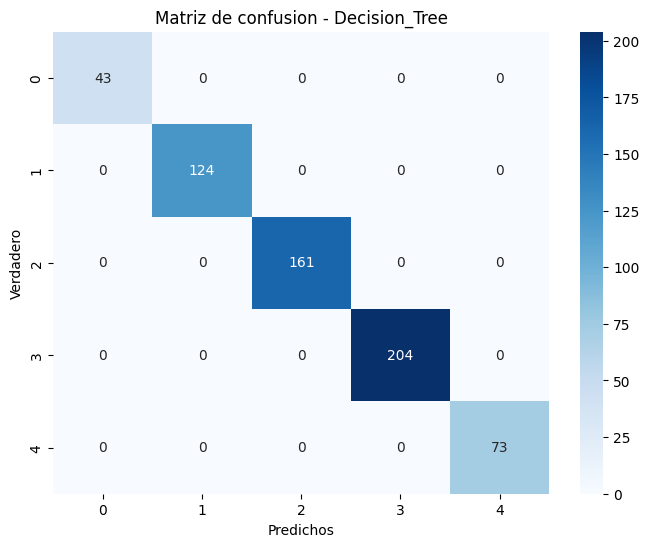

In [42]:
# Hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Optimización
tree = DecisionTreeClassifier(random_state=42)
grid_search_tree = RandomizedSearchCV(tree, param_distributions=param_grid, n_iter=10, scoring='f1_weighted', cv=5, random_state=42)
grid_search_tree.fit(X_train_scaled, y_train)
best_tree = grid_search_tree.best_estimator_

# Predicción y evaluación
y_pred_tree = best_tree.predict(X_test_scaled)
print("Decision Tree - Best Parameters:", grid_search_tree.best_params_)
print("Precision:", precision_score(y_test, y_pred_tree, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_tree, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred_tree, average="weighted"))

# Matriz de confusión
plot_matrix(y_test, y_pred_tree, job_levels, "Decision_Tree")


### Random Forest

Random Forest - Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
Precision: 0.9983694438239893
Recall: 0.9983471074380166
F1 Score: 0.9983506989410177


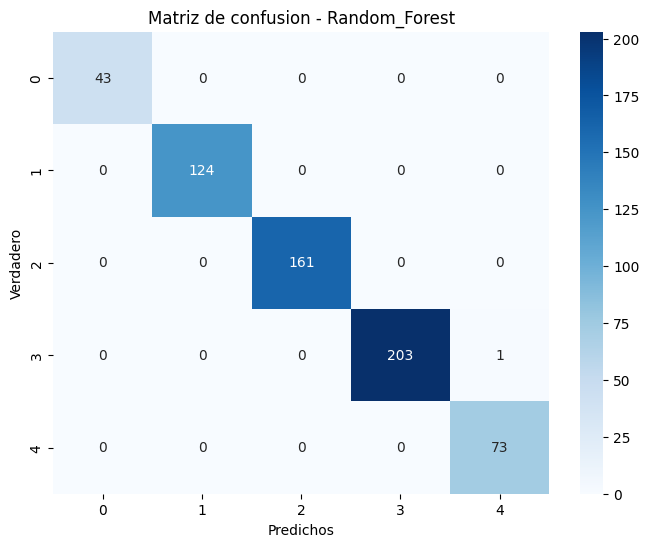

In [43]:
## RANDOM FOREST
# Hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Optimización
forest = RandomForestClassifier(random_state=42)
grid_search_forest = RandomizedSearchCV(forest, param_distributions=param_grid, n_iter=10, scoring='f1_weighted', cv=5, random_state=42)
grid_search_forest.fit(X_train_scaled, y_train)
best_forest = grid_search_forest.best_estimator_

# Predicción y evaluación
y_pred_forest = best_forest.predict(X_test_scaled)
print("Random Forest - Best Parameters:", grid_search_forest.best_params_)
print("Precision:", precision_score(y_test, y_pred_forest, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_forest, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred_forest, average="weighted"))

# Matriz de confusión
plot_matrix(y_test, y_pred_forest, job_levels, "Random_Forest")


### XGBOOST

XGBoost - Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


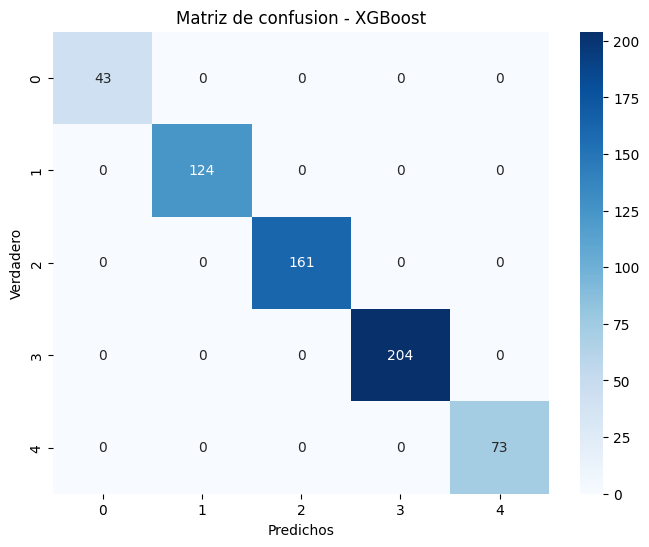

In [44]:
# Hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Optimización
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")
grid_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, scoring='f1_weighted', cv=5, random_state=42)
grid_search_xgb.fit(X_train_scaled, y_train)
best_xgb = grid_search_xgb.best_estimator_

# Predicción y evaluación
y_pred_xgb = best_xgb.predict(X_test_scaled)
print("XGBoost - Best Parameters:", grid_search_xgb.best_params_)
print("Precision:", precision_score(y_test, y_pred_xgb, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_xgb, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average="weighted"))

# Matriz de confusión
plot_matrix(y_test, y_pred_xgb, job_levels, "XGBoost")


### KNN

KNN - Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 9}
Precision: 0.7535015101248691
Recall: 0.7471074380165289
F1 Score: 0.7428839328171317


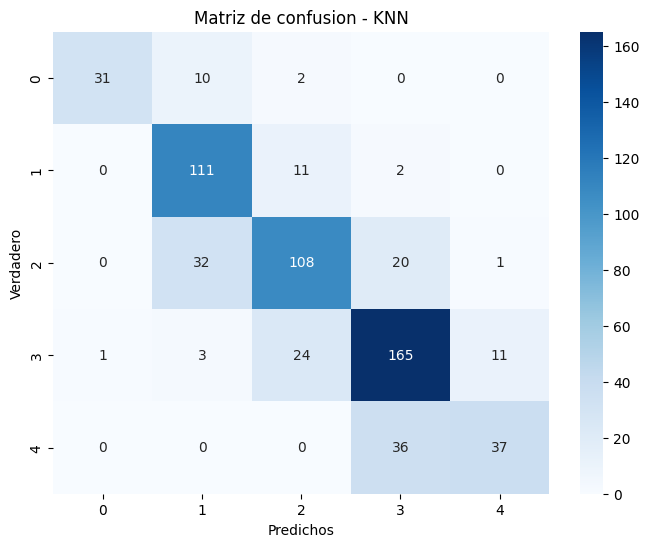

In [45]:
# Hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Distancia Manhattan (p=1) y Euclídea (p=2)
}

# Optimización
knn = KNeighborsClassifier()
grid_search_knn = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, scoring='f1_weighted', cv=5, random_state=42)
grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_

# Predicción y evaluación
y_pred_knn = best_knn.predict(X_test_scaled)
print("KNN - Best Parameters:", grid_search_knn.best_params_)
print("Precision:", precision_score(y_test, y_pred_knn, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_knn, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred_knn, average="weighted"))

# Matriz de confusión
plot_matrix(y_test, y_pred_knn, job_levels, "KNN")


In [46]:
## COMPARACIONES
# Comparar métricas
metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "KNN"],
    "Precision": [precision_score(y_test, y_pred_logreg, average="weighted"),
                  precision_score(y_test, y_pred_tree, average="weighted"),
                  precision_score(y_test, y_pred_forest, average="weighted"),
                  precision_score(y_test, y_pred_xgb, average="weighted"),
                  precision_score(y_test, y_pred_knn, average="weighted")],
    "Recall": [recall_score(y_test, y_pred_logreg, average="weighted"),
               recall_score(y_test, y_pred_tree, average="weighted"),
               recall_score(y_test, y_pred_forest, average="weighted"),
               recall_score(y_test, y_pred_xgb, average="weighted"),
               recall_score(y_test, y_pred_knn, average="weighted")]
})

# Mostrar el DataFrame
metrics


,Model,Precision,Recall
0,Logistic Regression,1.000000,1.000000
1,Decision Tree,1.000000,1.000000
2,Random Forest,0.998369,0.998347
3,XGBoost,1.000000,1.000000
4,KNN,0.753502,0.747107


Observo una precisión muy alta, lo que me hace sospechar overfitting.

## Validación cruzada

In [47]:
# Configurar k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir funciones de evaluación
scorers = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}


In [48]:
# Diccionario para almacenar los resultados
cv_results = {}

# Lista de modelos y nombres
models = {
    "Logistic Regression": logreg,
    "Decision Tree": tree,
    "Random Forest": forest,
    "XGBoost": xgb,
    "KNN": knn
}

# Validación cruzada para cada modelo y métrica
for model_name, model in models.items():
    print(f"\n{model_name}:")
    model_scores = {}
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
        model_scores[metric_name] = scores
        print(f"  {metric_name.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")
    cv_results[model_name] = model_scores



Logistic Regression:
  Precision - Mean: 1.0000, Std: 0.0000
  Recall - Mean: 1.0000, Std: 0.0000
  F1 - Mean: 1.0000, Std: 0.0000

Decision Tree:
  Precision - Mean: 0.9993, Std: 0.0013
  Recall - Mean: 0.9993, Std: 0.0013
  F1 - Mean: 0.9993, Std: 0.0013

Random Forest:
  Precision - Mean: 0.9950, Std: 0.0038
  Recall - Mean: 0.9950, Std: 0.0038
  F1 - Mean: 0.9950, Std: 0.0038

XGBoost:
  Precision - Mean: 1.0000, Std: 0.0000
  Recall - Mean: 1.0000, Std: 0.0000
  F1 - Mean: 1.0000, Std: 0.0000

KNN:
  Precision - Mean: 0.9997, Std: 0.0007
  Recall - Mean: 0.9997, Std: 0.0007
  F1 - Mean: 0.9997, Std: 0.0007


In [49]:
## EVALUACION SOBRE DATOS DE PRUEBAS
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       204
           4       1.00      1.00      1.00        73

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605


Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       204
           4       0.99      1.00      0.99        73

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00  

Sigue habiendo una presición muy alta, sin embargo tambien se observan desviaciones estandar bajas, lo cual puede ser un buen indicador

Buscaré las mejores configuraciones por modelo y los correré


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       204
           4       1.00      1.00      1.00        73

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605



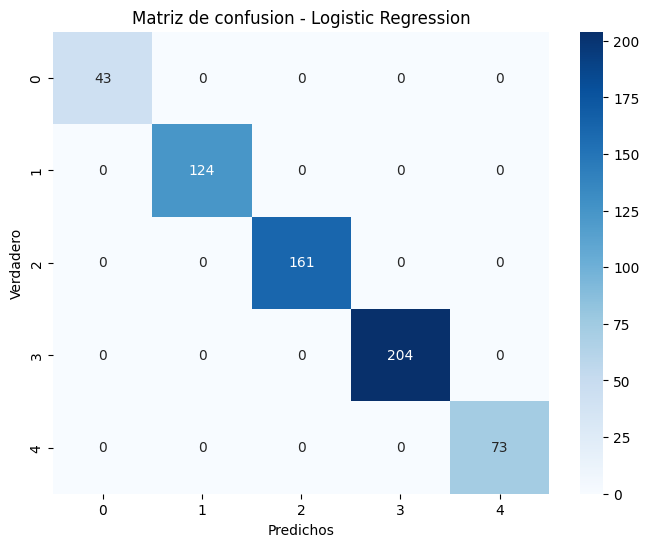


Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       204
           4       0.99      1.00      0.99        73

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605



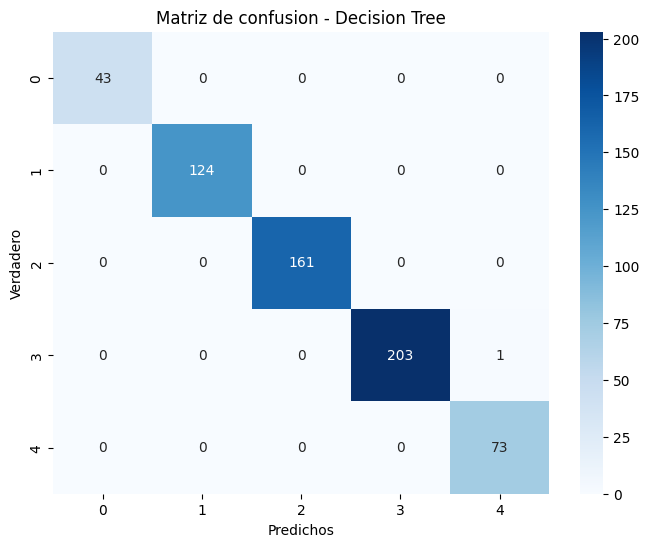


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       161
           3       1.00      0.99      1.00       204
           4       0.97      1.00      0.99        73

    accuracy                           1.00       605
   macro avg       0.99      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605



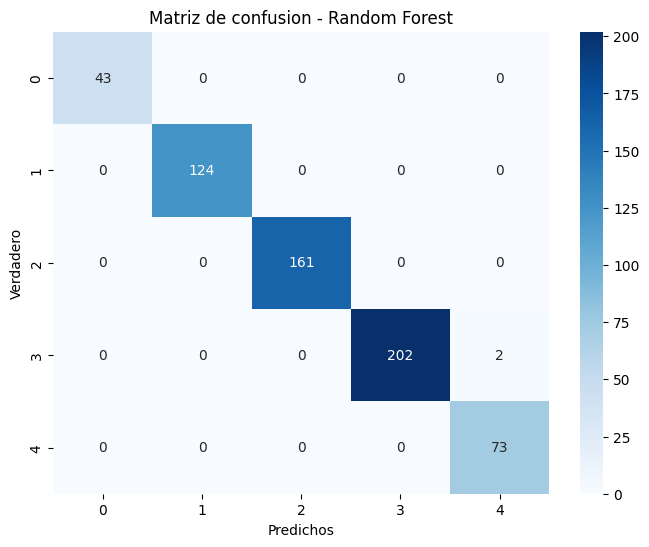


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       204
           4       1.00      1.00      1.00        73

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605



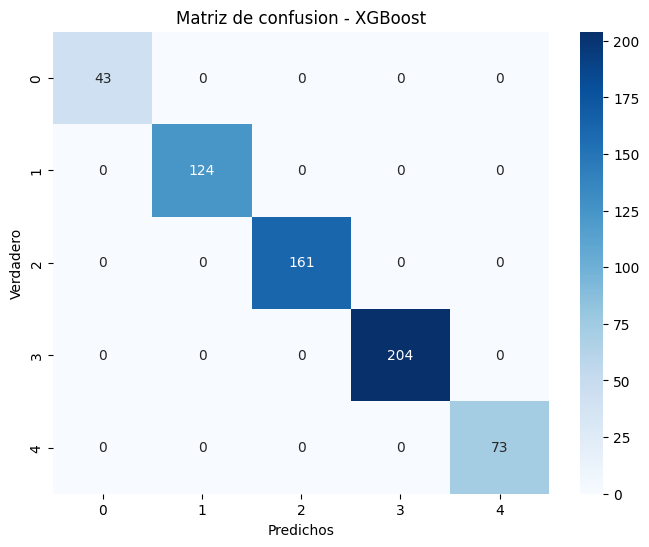


KNN Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       204
           4       1.00      1.00      1.00        73

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605



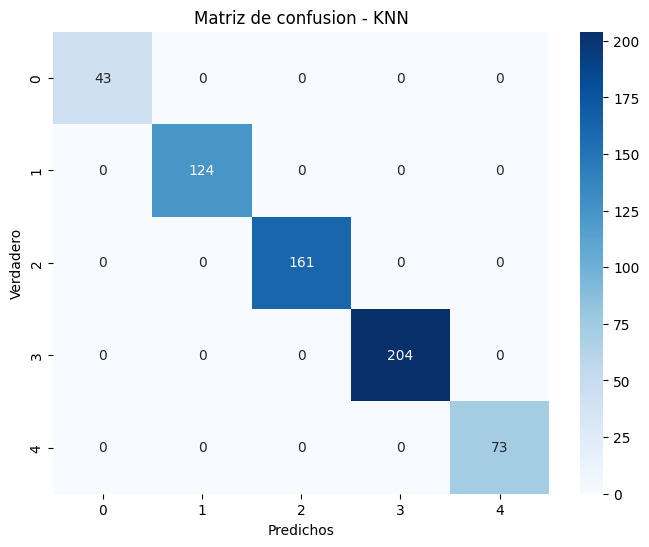

In [50]:
# Crear un diccionario para almacenar los modelos ajustados
best_models = {}

# Reentrenar los modelos con los mejores parámetros
for model_name, params in cv_results.items():
    # Filtrar los parámetros válidos
    if model_name == "Logistic Regression":
        valid_params = {key: params[key] for key in params if key in LogisticRegression().get_params().keys()}
        best_model = LogisticRegression(**valid_params, max_iter=1000)
    elif model_name == "Decision Tree":
        valid_params = {key: params[key] for key in params if key in DecisionTreeClassifier().get_params().keys()}
        best_model = DecisionTreeClassifier(**valid_params)
    elif model_name == "Random Forest":
        valid_params = {key: params[key] for key in params if key in RandomForestClassifier().get_params().keys()}
        best_model = RandomForestClassifier(**valid_params)
    elif model_name == "XGBoost":
        valid_params = {key: params[key] for key in params if key in XGBClassifier().get_params().keys()}
        best_model = XGBClassifier(**valid_params, use_label_encoder=False, eval_metric='logloss')
    elif model_name == "KNN":
        valid_params = {key: params[key] for key in params if key in KNeighborsClassifier().get_params().keys()}
        best_model = KNeighborsClassifier(**valid_params)
    
    # Ajustar el modelo a los datos de entrenamiento
    best_model.fit(X_train, y_train)
    
    # Almacenar el modelo ajustado
    best_models[model_name] = best_model

# Evaluar los modelos en el conjunto de prueba
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    plot_matrix(y_test, y_pred, job_levels, model_name)


Como las presiciones son altas, regularizaré los modelos

## Regularización

Regularizo todos los modelos

In [51]:
from sklearn.linear_model import Lasso

# Inicializa el modelo con el parámetro de regularización alpha
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

from sklearn.linear_model import Ridge

# Inicializa el modelo con el parámetro de regularización alpha
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

from sklearn.linear_model import ElasticNet

# Inicializa el modelo con los parámetros de regularización alpha y l1_ratio
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  
elastic_net.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=4)
tree.fit(X_train, y_train)

import xgboost as xgb

xgb_model = xgb.XGBClassifier(alpha=0.1, lambda_=1.0, n_estimators=100)
xgb_model.fit(X_train, y_train)




XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda_=1.0, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [52]:
# Definir modelos con regularización
models = {
    "Logistic Regression": LogisticRegression(solver='newton-cg', penalty='l2', C=1.0),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=4),
    "Random Forest": RandomForestClassifier(n_estimators=200, min_samples_split=5, max_depth=10, max_features='sqrt'),
    "XGBoost": xgb.XGBClassifier(subsample=0.7, n_estimators=100, max_depth=3, learning_rate=0.1, alpha=0.1, lambda_=1.0),
    "KNN": KNeighborsClassifier(weights='distance', n_neighbors=7, algorithm='brute')
}


cv_results = {}

for model_name, model in models.items():
    print(f"\n{model_name}:")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')  # Usando F1 macro
    cv_results[model_name] = scores
    print(f"  F1 - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")


Logistic Regression:
  F1 - Mean: 1.0000, Std: 0.0000

Decision Tree:
  F1 - Mean: 0.9996, Std: 0.0009

Random Forest:
  F1 - Mean: 0.9926, Std: 0.0045

XGBoost:
  F1 - Mean: 1.0000, Std: 0.0000

KNN:
  F1 - Mean: 0.9996, Std: 0.0009


Verifico que los modelos son muy precisos (inclusive llegando a 1), lo que me hace sospechar de un Random Forest es el modelo que menos probabilidad tiene de overfitting, por lo cual modificaré los hiperparámetros y hallaré la mejor combinación sobre este modelo.

Iteraré sobre los hiperparámetros para ver cuales dan mejores resultados sin overfitting (consideraré 0.1 como margen).

In [53]:
# Lista para almacenar los resultados
results = []

# Definir los rangos de cada hiperparámetro
max_depth_range = [3, 5, 10, 15, 20]
min_samples_split_range = [2, 5, 10, 15]
min_samples_leaf_range = [1, 2, 4, 10]
max_features_range = ['sqrt', 'log2', None]
n_estimators_range = [50, 100, 150, 200]

# Iterar sobre max_depth
for max_depth in max_depth_range:
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    results.append({
        'hyperparameter': 'max_depth',
        'value': max_depth,
        'mean_f1': scores.mean(),
        'std_f1': scores.std()
    })

# Iterar sobre min_samples_split
for min_samples_split in min_samples_split_range:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    results.append({
        'hyperparameter': 'min_samples_split',
        'value': min_samples_split,
        'mean_f1': scores.mean(),
        'std_f1': scores.std()
    })

# Iterar sobre min_samples_leaf
for min_samples_leaf in min_samples_leaf_range:
    model = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    results.append({
        'hyperparameter': 'min_samples_leaf',
        'value': min_samples_leaf,
        'mean_f1': scores.mean(),
        'std_f1': scores.std()
    })

# Iterar sobre max_features
for max_features in max_features_range:
    model = RandomForestClassifier(max_features=max_features, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    results.append({
        'hyperparameter': 'max_features',
        'value': max_features,
        'mean_f1': scores.mean(),
        'std_f1': scores.std()
    })

# Iterar sobre n_estimators
for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    results.append({
        'hyperparameter': 'n_estimators',
        'value': n_estimators,
        'mean_f1': scores.mean(),
        'std_f1': scores.std()
    })

# Convertir la lista de resultados en un DataFrame
cv_results_df_random_forest = pd.DataFrame(results)

# Mostrar el DataFrame con los resultados de cada hiperparámetro por separado
cv_results_df_random_forest.head(len(cv_results_df_random_forest))

,hyperparameter,value,mean_f1,std_f1
0,max_depth,3,0.868785,0.021971
1,max_depth,5,0.974506,0.010552
2,max_depth,10,0.991694,0.003742
3,max_depth,15,0.993417,0.003127
4,max_depth,20,0.992978,0.002928
5,min_samples_split,2,0.992978,0.002928
6,min_samples_split,5,0.993876,0.004014
7,min_samples_split,10,0.991688,0.004467
8,min_samples_split,15,0.991725,0.005008
9,min_samples_leaf,1,0.992978,0.002928


Ahora iteraré sobre los hiperparámetros anidados. Pero solo consideraré aquellos que tuvieron un buen desempeño cuando los itire individualmente:
- max_depth_range = [3, 5]
- min_samples_split_range = [10, 15]
- min_samples_leaf_range = range(6,11)
- max_features_range = ['sqrt', 'log2', None]
- n_estimators_range = [50]


In [54]:
# Lista para almacenar los resultados
results = []

# Definir los rangos de cada hiperparámetro
max_depth_range = [3, 5]
min_samples_split_range = [10, 15]
min_samples_leaf_range = range(6,11)
max_features_range = ['sqrt', 'log2', None]
n_estimators_range = [50]

# Crear todas las combinaciones de hiperparámetros
combinations = itertools.product(
    max_depth_range,
    min_samples_split_range,
    min_samples_leaf_range,
    max_features_range,
    n_estimators_range
)

# Iterar sobre cada combinación de hiperparámetros
for max_depth, min_samples_split, min_samples_leaf, max_features, n_estimators in combinations:
    model = RandomForestClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        n_estimators=n_estimators,
        random_state=42
    )
    
    # Evaluar el modelo con validación cruzada
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    
    # Almacenar los resultados
    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'n_estimators': n_estimators,
        'mean_f1': scores.mean(),
        'std_f1': scores.std()
    })

# Convertir la lista de resultados en un DataFrame
cv_results_df_random_forest = pd.DataFrame(results)

#Tamaño DF
tamaño = len(cv_results_df_random_forest)
# Mostrar el DataFrame con los resultados de cada combinación de hiperparámetros
cv_results_df_random_forest.head(tamaño)


,max_depth,min_samples_split,min_samples_leaf,max_features,n_estimators,mean_f1,std_f1
0,3,10,6,sqrt,50,0.880385,0.019596
1,3,10,6,log2,50,0.825533,0.018334
2,3,10,6,None,50,0.979070,0.007850
3,3,10,7,sqrt,50,0.880385,0.019596
4,3,10,7,log2,50,0.826589,0.019719
5,3,10,7,None,50,0.978656,0.007702
6,3,10,8,sqrt,50,0.880385,0.019596
7,3,10,8,log2,50,0.824667,0.018527
8,3,10,8,None,50,0.979126,0.006212
9,3,10,9,sqrt,50,0.880385,0.019596


Ordeno el DF para un mejor reconocimiento visual

In [55]:
# Ordenar el DataFrame por la columna mean_f1 en orden descendente
cv_results_df_random_forest_sorted = cv_results_df_random_forest.sort_values(by='mean_f1', ascending=False)

# Mostrar el DataFrame ordenado
cv_results_df_random_forest_sorted.head(tamaño)


,max_depth,min_samples_split,min_samples_leaf,max_features,n_estimators,mean_f1,std_f1
47,5,15,6,None,50,0.999569,0.000862
50,5,15,7,None,50,0.999569,0.000862
32,5,10,6,None,50,0.999569,0.000862
35,5,10,7,None,50,0.999569,0.000862
53,5,15,8,None,50,0.999138,0.001055
38,5,10,8,None,50,0.999138,0.001055
41,5,10,9,None,50,0.998712,0.001716
56,5,15,9,None,50,0.998712,0.001716
44,5,10,10,None,50,0.997045,0.004904
59,5,15,10,None,50,0.997045,0.004904


Como las desviaciones estandar son bajas, los mean_f1 más altos son mejores. <br>
Por ello seleccionaré:
- max_depth:5	
- min_samples_split:15	
- min_samples_leaf:6	
- max_features:None	
- n_estimators:50	
- mean_f1:0.999569	
- std_f1:0.000862
							

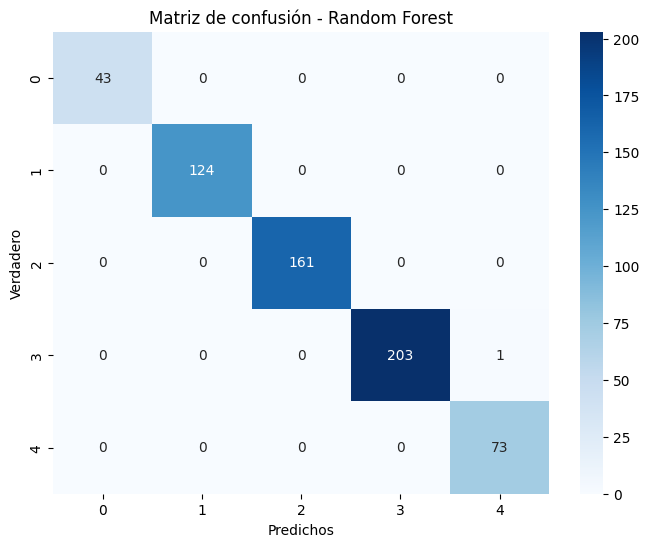

In [56]:
# Configuración del modelo con los mejores hiperparámetros
best_rf = RandomForestClassifier(
    max_depth=5,
    min_samples_split=15,
    min_samples_leaf=6,
    max_features=None,
    n_estimators=50,
    random_state=42
)

# Entrena el modelo con el conjunto de entrenamiento
best_rf.fit(X_train, y_train)

# Realiza las predicciones en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Define la función para mostrar la matriz de confusión
def plot_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predichos")
    plt.ylabel("Verdadero")
    plt.title(f"Matriz de confusión - {model_name}")
    plt.show()

# Llama a la función para mostrar la matriz de confusión
classes = sorted(y_test.unique())  # Ajusta esto según tus clases
plot_matrix(y_test, y_pred, classes, "Random Forest")

Verificaré con una corva de aprendizaje que no haya overfitting.

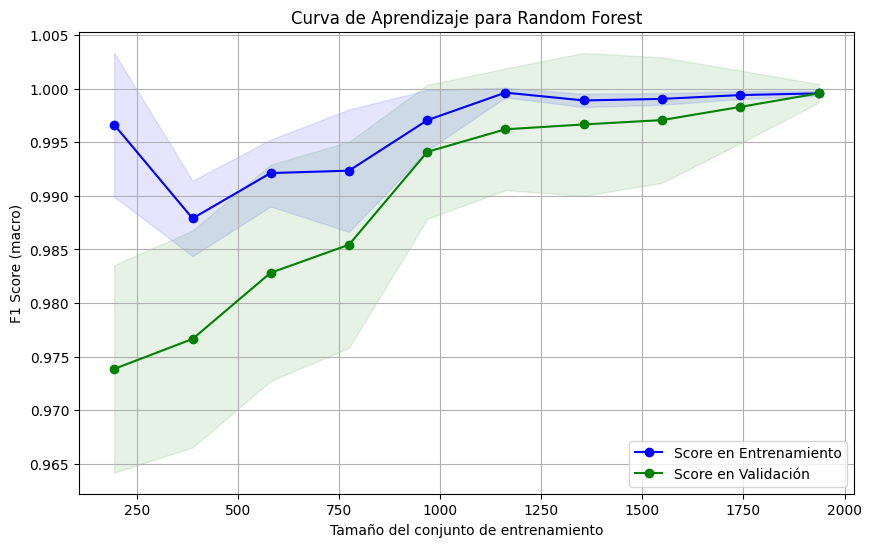

In [57]:
# Obteniendo curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculando medias y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficando las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Score en Entrenamiento")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Score en Validación")

# Área de desviación estándar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

# Títulos y etiquetas
plt.title("Curva de Aprendizaje para Random Forest")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("F1 Score (macro)")
plt.legend(loc="best")
plt.grid()
plt.show()


Si bien es cierto la curva empieza alejada, se aproximan bastante bien y rápido. Lo que indica que generaliza bien y hay pocas posibilidades de overfitting.

# Conclusiones Machine Learning

Recordar que las hipótesis fueron corroboradas en el 
[análisis exploratorio.](#conclusiones-análisis-exploratorio)

- Los modelos presentan un excelente aprendizaje. Sin embargo, hay que tener cuidado con el overfitting.
- Tras regularizar los hiperparámetros, se encontró que Random Forest aprendió excelentemente y predijo el test con una precisión de. Además, se comprobó que no existiera overfitting.
- Arboles de decisión y KNN también tiene alta precisión y baja desviación. Sin embargo, existe mayor probabilidad de overfitting en estos modelos.